# 3DS Notebook
## Section
### Sub-section

For the ENCH 470/670 Final Project, groups will submit:

An annotated Jupyter Notebook (shared on GitHub!)
A video presentation (maximum 20 minutes)


According to the syllabus, out of a total of 100 points, the final project is:

·       Problem Setup – 15% 

·       Analysis – 15%

·       Data visualizations – 15%

·       Code style – 15%

·       Presentation – 15%

·       Individual effort – 25% 

Individual effort will be assessed in part using peer evaluations, which I will collect through a Google form after the projects have been submitted.

In [116]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


Loading the CSV file

In [119]:
df = pd.read_csv("weather_data_with_fires.csv")
df.head()



C:\Users\danie\AppData\Local\Temp\ipykernel_37276\2377796695.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("weather_data_with_fires.csv")


,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,MAX,TEMP,WDSP,FIRE_NAME,FIRE_OCCURRENCE
0,A0685400115,34.264,-116.854,2057.1,1/2/2015,39.2,16.8,1.2,NaN,0
1,A0685400115,34.264,-116.854,2057.1,1/3/2015,48.2,24.1,1.0,NaN,0
2,A0685400115,34.264,-116.854,2057.1,1/4/2015,51.8,29.5,1.7,NaN,0
3,A0685400115,34.264,-116.854,2057.1,1/5/2015,53.6,32.8,2.1,NaN,0
4,A0685400115,34.264,-116.854,2057.1,1/6/2015,55.4,33.6,2.0,NaN,0


Pre-Process the Data

In [122]:
# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Extract month, and day from DATE
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

# Drop unnecessary columns
df = df.drop(columns=['STATION', 'DATE', 'FIRE_NAME'])
df = df.dropna()

# Remove invalid rows where MAX temperature is abnormally high
df = df[df['MAX'] < 300]  # Assumes real temperatures are under 300°F

print(df)

        LATITUDE  LONGITUDE  ELEVATION   MAX  TEMP  WDSP  FIRE_OCCURRENCE  \
0        34.2640  -116.8540     2057.1  39.2  16.8   1.2                0   
1        34.2640  -116.8540     2057.1  48.2  24.1   1.0                0   
2        34.2640  -116.8540     2057.1  51.8  29.5   1.7                0   
3        34.2640  -116.8540     2057.1  53.6  32.8   2.1                0   
4        34.2640  -116.8540     2057.1  55.4  33.6   2.0                0   
...          ...        ...        ...   ...   ...   ...              ...   
256443   34.4141  -119.8796        5.5  60.1  48.5   0.0                0   
256444   34.4141  -119.8796        5.5  60.4  54.8   0.0                0   
256445   34.4141  -119.8796        5.5  63.3  52.4   0.0                0   
256446   34.4141  -119.8796        5.5  64.9  51.2   0.0                0   
256447   34.4141  -119.8796        5.5  67.3  60.5   0.0                0   

        MONTH  DAY  
0           1    2  
1           1    3  
2           

Splitting data and training the model

In [71]:
# Features and label
X = df.drop(columns=['FIRE_OCCURRENCE'])
y = df['FIRE_OCCURRENCE']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Accuracy: 0.9937952430196484
Mean Squared Error: 0.0062047569803516025
R^2 Score: 0.10548344006216559


The block of code below shows the input and prediction of the model. To use it, edit the 8 features below before running it.

In [73]:
prediction_data = pd.DataFrame([{
    'LATITUDE': 34.264,     # Latitude of the location
    'LONGITUDE': -116.854,  # Longitude of the location
    'ELEVATION': 2057.1,    # Elevation in meters
    'MAX': 62.6,            # Max temperature in Fahrenheit   
    'TEMP': 46.1,           # Current temperature in Fahrenheit
    'WDSP': 5,              # Wind speed in mph
    'MONTH': 5,             # Month of the year (1-12)
    'DAY': 5                # Day of the month (1-31)
}])

# Predict probability of fire
fire_probability = model.predict_proba(prediction_data)[0, 1]
print(f"Predicted chance of fire: {fire_probability:.2%}")

Predicted chance of fire: 4.00%


The following shows the various graphs to take a closer look at the data.

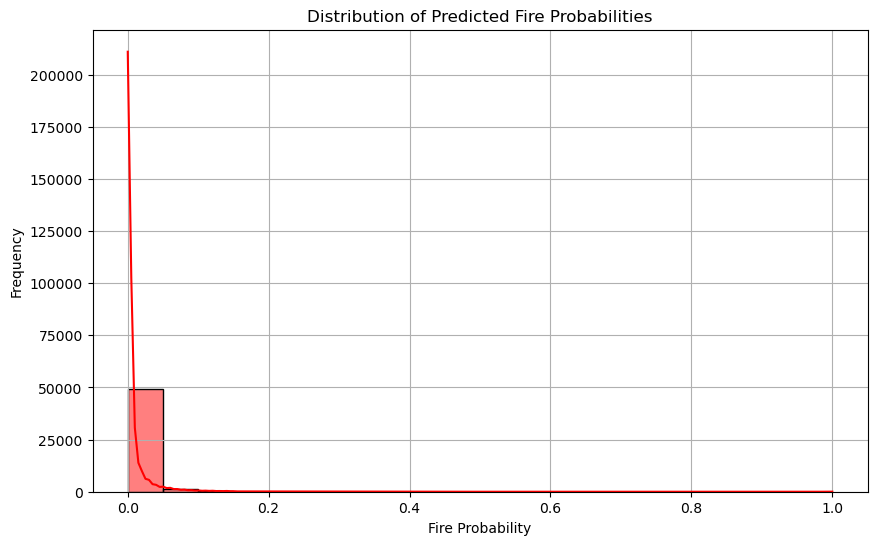

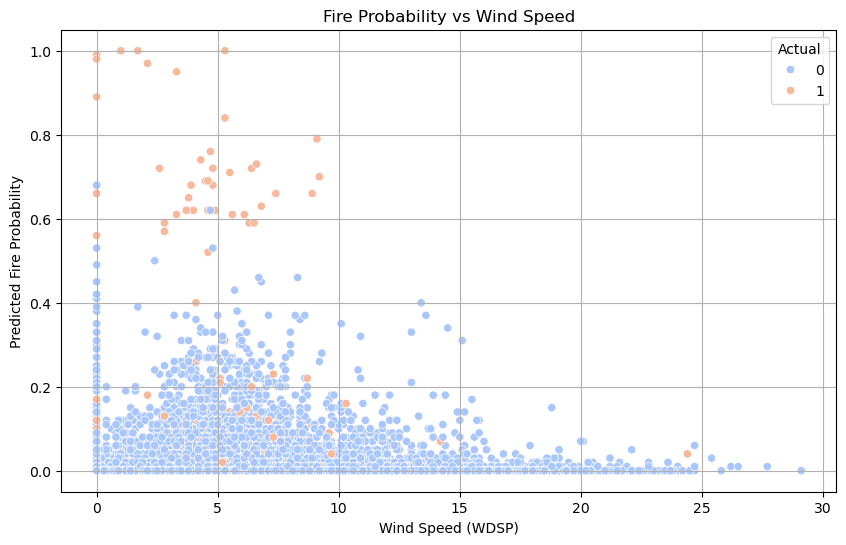

C:\Users\danie\AppData\Local\Temp\ipykernel_37276\3264707392.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='Fire_Probability', data=monthly_avg, palette='viridis')


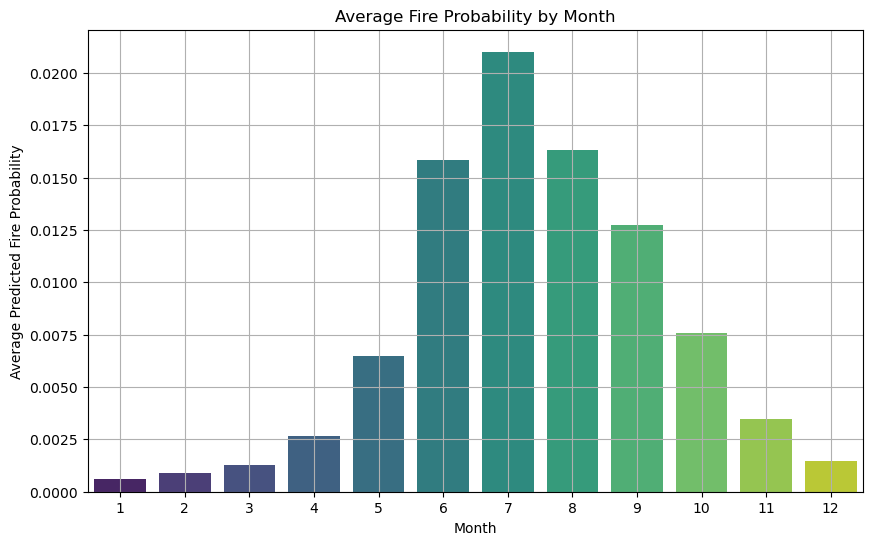

C:\Users\danie\AppData\Local\Temp\ipykernel_37276\3264707392.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


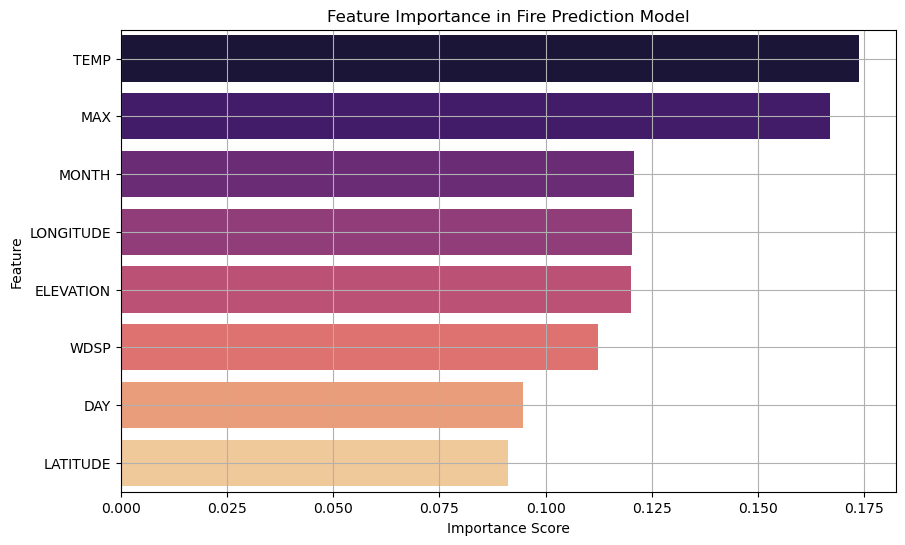

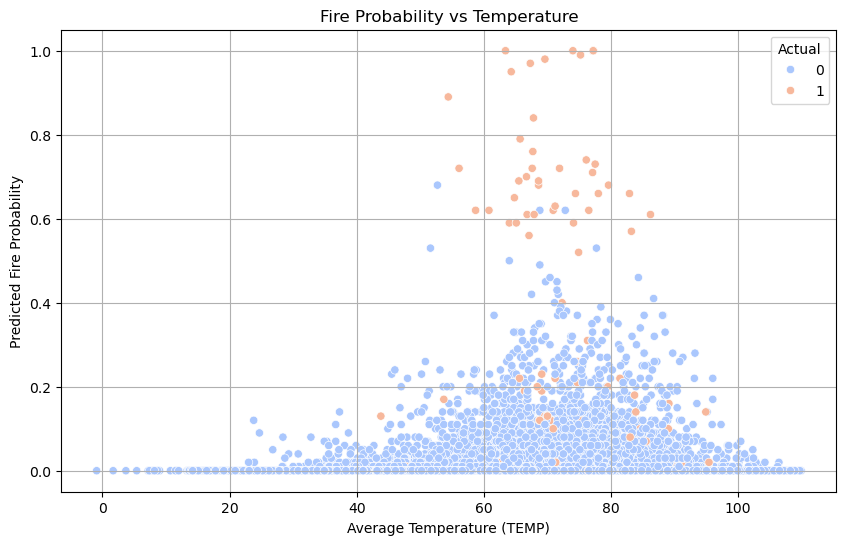

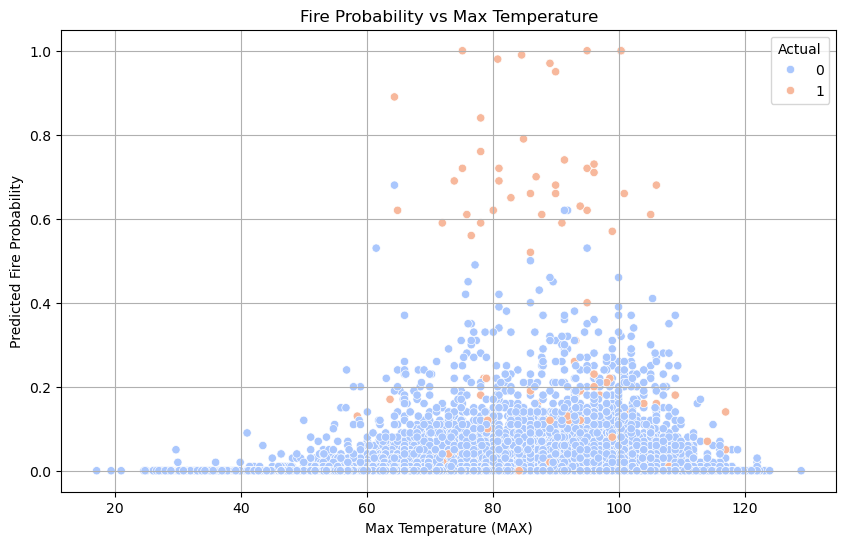

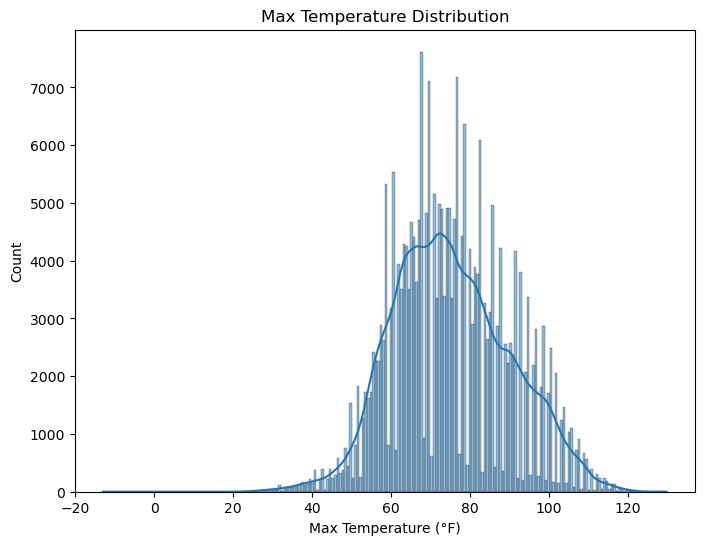

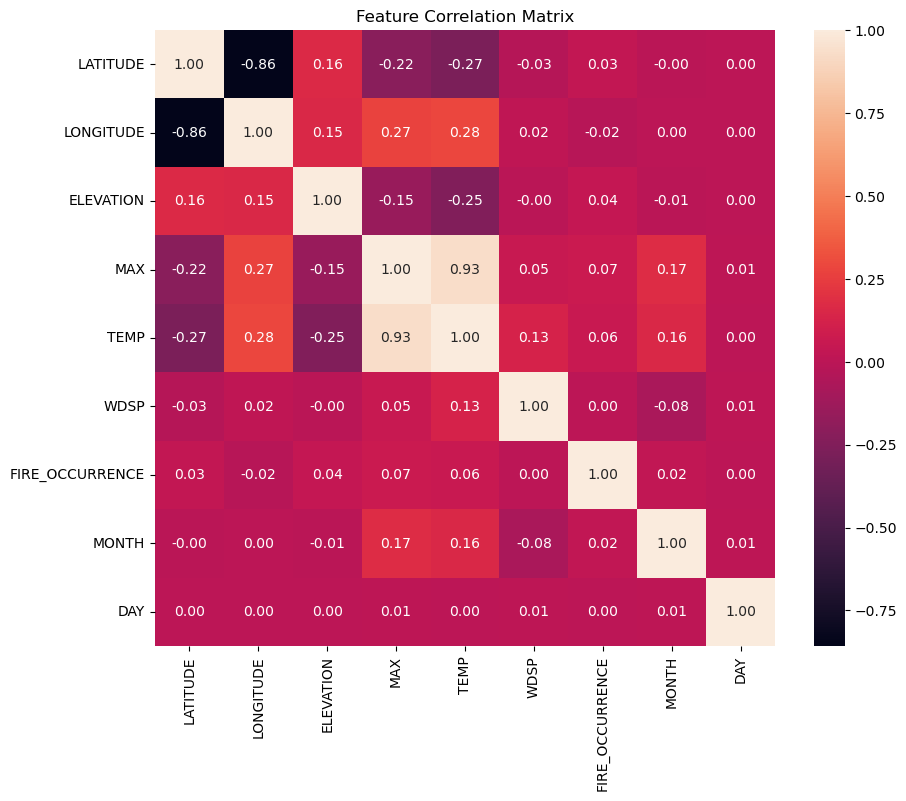

In [124]:
# Predict fire probabilities on test set
probs = model.predict_proba(X_test)[:, 1]

# Build a DataFrame for plotting
results_df = X_test.copy()
results_df['Fire_Probability'] = probs
results_df['Actual'] = y_test.values

# Plot 1: Distribution of Predicted Fire Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(probs, bins=20, kde=True, color='red')
plt.title('Distribution of Predicted Fire Probabilities')
plt.xlabel('Fire Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Fire Probability vs. Wind Speed (if WDSP exists)
if 'WDSP' in results_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='WDSP', y='Fire_Probability',
        hue='Actual',
        data=results_df,
        palette='coolwarm'
    )
    plt.title('Fire Probability vs Wind Speed')
    plt.xlabel('Wind Speed (WDSP)')
    plt.ylabel('Predicted Fire Probability')
    plt.grid(True)
    plt.show()

# Plot 3: Average Fire Probability by Month
if 'MONTH' in results_df.columns:
    monthly_avg = results_df.groupby('MONTH')['Fire_Probability'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MONTH', y='Fire_Probability', data=monthly_avg, palette='viridis')
    plt.title('Average Fire Probability by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Predicted Fire Probability')
    plt.grid(True)
    plt.show()
    
# 4. Feature Importance Plot
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Feature Importance in Fire Prediction Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# 5. Fire Probability vs Average Temperature
if 'TEMP' in results_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TEMP', y='Fire_Probability', data=results_df, hue='Actual', palette='coolwarm')
    plt.title('Fire Probability vs Temperature')
    plt.xlabel('Average Temperature (°F)(TEMP)')
    plt.ylabel('Predicted Fire Probability')
    plt.grid(True)
    plt.show()

# 6. Fire Probability vs Max Temperature
if 'MAX' in results_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='MAX', y='Fire_Probability', data=results_df, hue='Actual', palette='coolwarm')
    plt.title('Fire Probability vs Max Temperature')
    plt.xlabel('Max Temperature (°F)(MAX)')
    plt.ylabel('Predicted Fire Probability')
    plt.grid(True)
    plt.show()

#8. Temperature Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['MAX'], kde=True)
plt.title("Max Temperature Distribution")
plt.xlabel("Max Temperature (°F)")
plt.ylabel("Count")
plt.show()

#9. Correlation Heatmap
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Pre-Process the Data (2) {This isn't used in the final model}

In [77]:
# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Extract month, and day from DATE
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

# Drop unnecessary columns
df = df.drop(columns=['STATION', 'DATE', 'FIRE_NAME'])
df = df.dropna()

# Remove invalid rows where MAX temperature is abnormally high
df = df[df['MAX'] < 300]  # Assumes real temperatures are under 300°F

# putting LATITUDE and LONGITUDE together
coords = df[['LATITUDE', 'LONGITUDE']]

# Create location clusters
kmeans = KMeans(n_clusters=10, random_state=42)
df['REGION'] = kmeans.fit_predict(coords)

# Drop raw coordinates
df = df.drop(columns=['LATITUDE', 'LONGITUDE'])

# Include REGION in your model
X = df.drop(columns=['FIRE_OCCURRENCE'])
y = df['FIRE_OCCURRENCE']


KeyError: 'DATE'

This code block tests for clustering location rather than stictly looking at the latitude and longitude. It's not part of the final model.

In [ ]:
# 1. Load your dataset (or use an existing DataFrame called df)
df2 = pd.read_csv("weather_data_with_fires.csv")

# 2. Select coordinates
coords = df2[['LATITUDE', 'LONGITUDE']]

# 3. Apply KMeans clustering to coordinates
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df2['REGION'] = kmeans.fit_predict(coords)

# 4. Plot the clusters on a map
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df2['LONGITUDE'], df2['LATITUDE'],
    c=df2['REGION'], cmap='tab10', s=10
)
plt.colorbar(scatter, label='Region Cluster')
plt.title(f'Geographic Clustering of Fire Data ({n_clusters} Regions)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
